In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
                [10, 2], [10, 4], [10, 0]])

In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X)

C:\Users\Ranga Pavan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=0)

In [6]:
clusters=kmeans.labels_

In [7]:
clusters

array([1, 1, 1, 0, 0, 0])

In [8]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [9]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [10]:
 kmeans.predict([[20,300]])

array([0])

In [11]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=10000,centers=3,n_features=2,random_state=11)

In [12]:
X

array([[ -0.45499274,   0.05429169],
       [ -5.85588884,  -9.53939845],
       [ -2.17069201,   5.14832994],
       ...,
       [ -6.35887037, -11.7271041 ],
       [ -2.61845154,  -1.34189437],
       [  0.08694821,  -1.33584383]])

In [13]:
y

array([2, 0, 1, ..., 0, 2, 2])

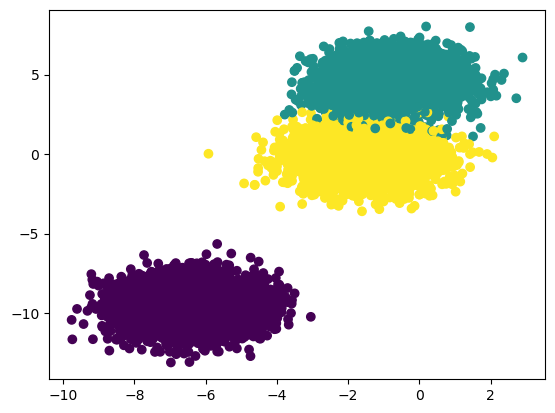

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)

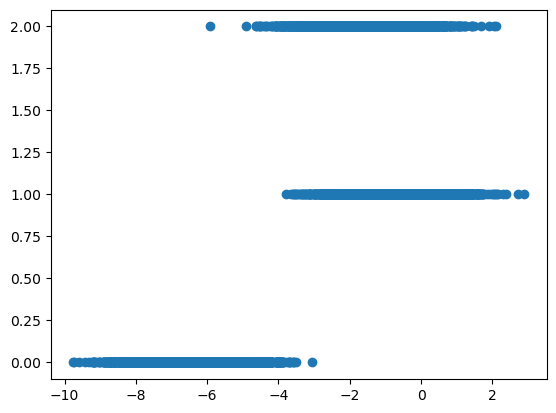

In [15]:
plt.scatter(X[:,0],y)

In [16]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=24)

In [17]:

import warnings
warnings.filterwarnings('ignore')
wcss=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[39685.56028231886,
 13115.343356236188,
 11614.923270068877,
 10186.201860514735,
 8896.382763096084,
 7778.456792252597,
 6782.945285688752,
 5932.744592069157,
 5482.762013227364]

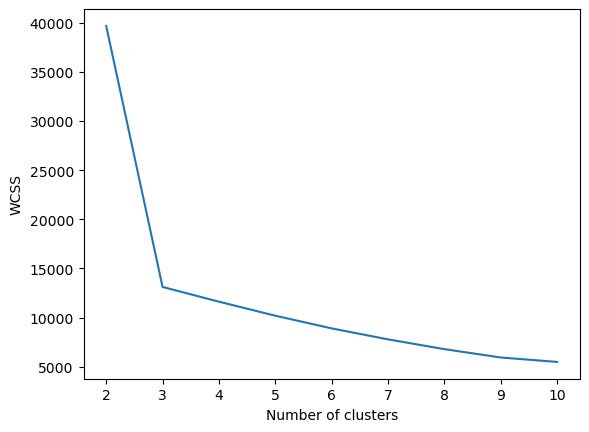

In [19]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.show()

### Based on the above graph total number of clusters is 3, because of number of clusters from 3 to 10 will decrease less compare to 2 to 3

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [21]:
y_pred = kmeans.fit_predict(X_train)

In [22]:
y_pred

array([1, 0, 2, ..., 2, 1, 1])

In [23]:
y_pred.shape

(6700,)

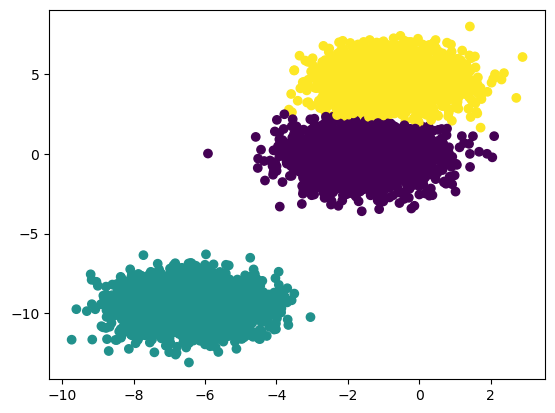

In [24]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred)

In [25]:
from kneed import KneeLocator

In [26]:
pip install kneed

In [27]:
from kneed import KneeLocator

In [28]:
knee= KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')

In [29]:
knee

In [30]:
knee.elbow

3

## Silhouette Score

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
score=[]
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    a = silhouette_score(X_train,labels=kmeans.labels_)
    score.append(a)
    
     
    

In [33]:
score

[0.7696371741280061,
 0.7058323112128233,
 0.5708798622278815,
 0.4005657993224931,
 0.3080239051812636,
 0.3202388796289866,
 0.32851723542980416,
 0.3331544610695015,
 0.3236795756567905]

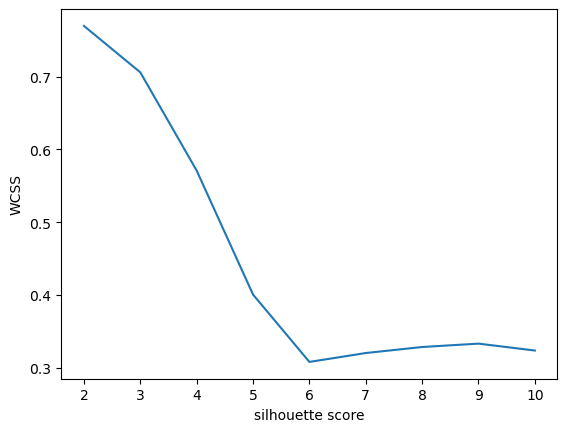

In [34]:
plt.plot(range(2,11),score)
plt.xticks(range(2,11))
plt.ylabel('WCSS')
plt.xlabel('silhouette score')
plt.show()